In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 6M-0K-99K.users.dataset.public.csv to 6M-0K-99K.users.dataset.public.csv


Missing values:
country              0
socialNbFollowers    0
socialNbFollows      0
productsListed       0
productsSold         0
productsBought       0
gender               0
hasAnyApp            0
seniorityAsYears     0
dtype: int64

Correlation between Followers and Sales: 0.63


/tmp/ipython-input-1681207734.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hasAnyApp', y='productsBought', data=df, palette='magma')


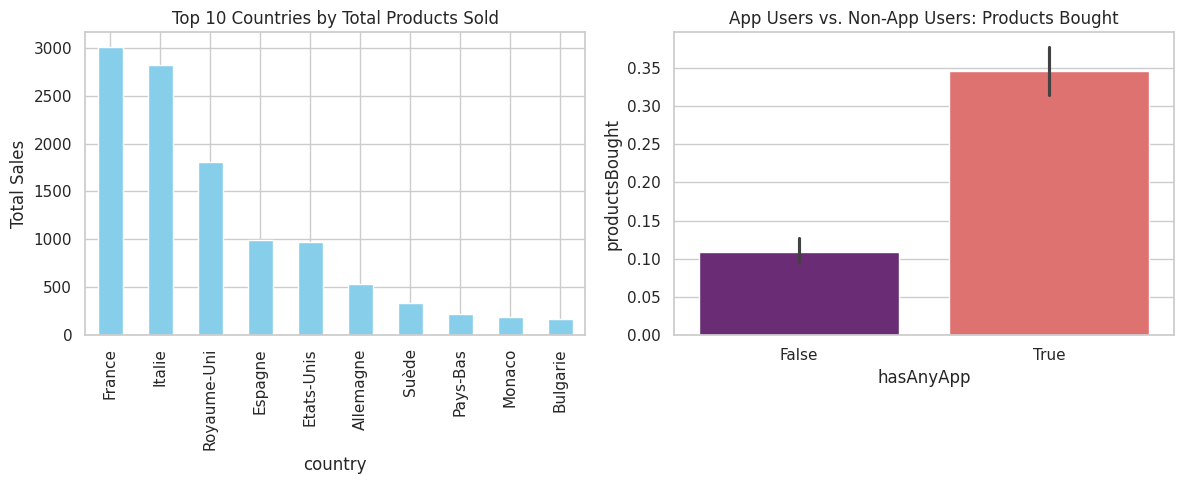

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv')

# --- 1. DATA CLEANING ---
# We keep only the columns relevant to user behavior
cols = ['country', 'socialNbFollowers', 'socialNbFollows', 'productsListed',
        'productsSold', 'productsBought', 'gender', 'hasAnyApp', 'seniorityAsYears']
df = df[cols]

# Check for missing values (there are none in this dataset, but good to show you checked!)
print(f"Missing values:\n{df.isnull().sum()}")

# --- 2. EXPLORATORY ANALYSIS ---
# Metric: Which countries have the most active sellers?
top_seller_countries = df.groupby('country')['productsSold'].sum().sort_values(ascending=False).head(10)

# Metric: Social Engagement vs. Sales (Do followers equal more sales?)
correlation = df[['socialNbFollowers', 'productsSold']].corr().iloc[0,1]
print(f"\nCorrelation between Followers and Sales: {correlation:.2f}")

# --- 3. VISUALIZATION ---
plt.figure(figsize=(12, 5))

# Plot 1: Top Countries by Sales
plt.subplot(1, 2, 1)
top_seller_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Products Sold')
plt.ylabel('Total Sales')

# Plot 2: App Usage vs. Buying Behavior
plt.subplot(1, 2, 2)
sns.barplot(x='hasAnyApp', y='productsBought', data=df, palette='magma')
plt.title('App Users vs. Non-App Users: Products Bought')
plt.tight_layout()
plt.show()